## WSL Wave Score Analysis

### In this notebook the scores that were collected from the wsl web scraper notebook are read in and analyzed. The three main library that will be used to do the analysis and visualization are pandas, numpy, matplotlib, and seaborn. 

### From the analysis I hope to uncover whether being selective in the choice of waves or catching as many as possible is more benefial for individual surfers. I also hope to learn if individuals become more or less selective as they progress through the contest, if they are influenced by who they are surfing against, or if location may play a role in there selection.


#### By: Connor Secen

In [1]:
# all required imports
import operator
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt; plt.rcdefaults()
from mpl_toolkits.mplot3d import axes3d

%matplotlib inline

#### The first step of the analysis process is to read in the file created by the scraper notebook. The head and tail of this csv file is displayed below.

In [2]:
file = './combined_csv.csv'
org_df = pd.read_csv(file)   # read in the file and store in a pandas dataframe named df1
display(org_df.head(6))
display(org_df.tail(6))
modified_df = org_df.copy()

,Year,Name,Event,Round,Scores
0,2016,I. Ferreira,Quiksilver Pro Gold Coast,Round 1,"['5.17', '3.33', '6.83', '1.70', '1.10', '2.27..."
1,2016,R. Callinan,Quiksilver Pro Gold Coast,Round 1,"['4.83', '3.80', '6.27', '4.83', '\xa0', '\xa0..."
2,2016,K. Asing,Quiksilver Pro Gold Coast,Round 1,"['2.67', '2.17', '1.67', '0.27', '2.77', '4.80..."
3,2016,M. Bourez,Quiksilver Pro Gold Coast,Round 1,"['4.50', '3.67', '4.43', '1.70', '2.27', '7.00..."
4,2016,A. Melling,Quiksilver Pro Gold Coast,Round 1,"['2.67', '0.37', '0.37', '5.50', '4.87', '\xa0..."
5,2016,J. Wilson,Quiksilver Pro Gold Coast,Round 1,"['0.23', '2.33', '0.47', '1.40', '1.83', '3.73..."


,Year,Name,Event,Round,Scores
3690,2018,G. Medina,Billabong Pipe Masters,Semifinals,"['7.17', '6.33', '9.10', '\xa0']"
3691,2018,J. Smith,Billabong Pipe Masters,Semifinals,"['7.33', '8.50', '0.10', '7.27']"
3692,2018,J. Wilson,Billabong Pipe Masters,Semifinals,"['1.23', '8.77', '2.77', '5.43', '0.50', '\xa0..."
3693,2018,K. Slater,Billabong Pipe Masters,Semifinals,"['3.33', '0.20', '6.90', '1.80', '4.27', '0.17..."
3694,2018,G. Medina,Billabong Pipe Masters,Finals,"['8.43', '6.17', '7.60', '8.77', '9.57', '6.10..."
3695,2018,J. Wilson,Billabong Pipe Masters,Finals,"['3.17', '0.60', '7.93', '8.77', '0.57', '0.50..."


#### The next step is to clean the data. Because of the way the data was formatted on the wsl website, some scores in the surfers list of scores for a specific heat are represented as '/xa0', which can be seen above. These values need to be removed from the list of scores in order to easily determine the number of waves caught in a heat.

#### To account for this, a new column will be added called Raw-Scores, which will hold what is currently in the scores column and the Scores column will hold an updated list of only scored waves, converted to floats.

#### Also, because I am already looping through all the rows, I will add another 3 columns called Wave-Count, Avg.-Score, and Heat-Total to make analysis easier.

In [3]:
modified_df['Raw-Scores'] = np.empty((len(modified_df), 0)).tolist()   # add new column to df2 with preset value of empty list
modified_df['Wave-Count'] = 0   # add new column to df2 with preset value of 0
modified_df['Avg.-Score'] = 0.0   # add new column to df2 with preset value of 0.0

for i, row in modified_df.iterrows():
    rawScores = row['Scores']
    rawScores = eval(rawScores)   # collect the current value and convert to a list of strings
    stringScores = [x for x in rawScores if x != '\xa0']   # remove all \xa0 values from the list
    stringScores = [x for x in stringScores if x != 'TBD']   # remove all TBD values from the list
    
    # in some instances foot note numbers were collected. This removes these additional numbers
    for i2, x2 in enumerate(stringScores):
        if ' ' in x2:   # check if space in string indicating foot note
            space = x2.find(' ')   # find index of space
            x2 = x2[:space]   # remove end of string starting at space
            stringScores[i2] = x2
    
    scores = list(map(float, stringScores))   # convert all values to floats
    scores_copy = scores.copy()
    
    # calculate the average wave score for the heat
    totalScore = 0
    for s in scores:
        totalScore += s
    if totalScore == 0:
        avgScore = 0.0
    else:
        avgScore = totalScore/len(scores)
    
    heat_score = 0
    if len(scores_copy) >= 2 :
        top_index = scores_copy.index(max(scores_copy))
        heat_score += scores_copy.pop(top_index)
        second_top_index = scores_copy.index(max(scores_copy))
        heat_score += scores_copy.pop(second_top_index)
    elif len(scores_copy) == 1:
        top_index = scores_copy.index(max(scores_copy))
        heat_score = scores_copy.pop(top_index)
        
    # add new values to the dataframe
    modified_df.at[i,'Scores'] = scores
    modified_df.at[i,'Raw-Scores'] = rawScores
    modified_df.at[i,'Wave-Count'] = len(scores)
    modified_df.at[i,'Avg.-Score'] = round(avgScore,2)
    modified_df.at[i,'Heat-Total'] = heat_score
    
display(modified_df.head(6))
display(modified_df.tail(6))

,Year,Name,Event,Round,Scores,Raw-Scores,Wave-Count,Avg.-Score,Heat-Total
0,2016,I. Ferreira,Quiksilver Pro Gold Coast,Round 1,"[5.17, 3.33, 6.83, 1.7, 1.1, 2.27, 4.77, 2.9]","[5.17, 3.33, 6.83, 1.70, 1.10, 2.27, 4.77, 2.90]",8,3.51,12.00
1,2016,R. Callinan,Quiksilver Pro Gold Coast,Round 1,"[4.83, 3.8, 6.27, 4.83]","[4.83, 3.80, 6.27, 4.83, , , , ]",4,4.93,11.10
2,2016,K. Asing,Quiksilver Pro Gold Coast,Round 1,"[2.67, 2.17, 1.67, 0.27, 2.77, 4.8, 4.0]","[2.67, 2.17, 1.67, 0.27, 2.77, 4.80, 4.00, ]",7,2.62,8.80
3,2016,M. Bourez,Quiksilver Pro Gold Coast,Round 1,"[4.5, 3.67, 4.43, 1.7, 2.27, 7.0]","[4.50, 3.67, 4.43, 1.70, 2.27, 7.00, ]",6,3.93,11.50
4,2016,A. Melling,Quiksilver Pro Gold Coast,Round 1,"[2.67, 0.37, 0.37, 5.5, 4.87]","[2.67, 0.37, 0.37, 5.50, 4.87, , ]",5,2.76,10.37
5,2016,J. Wilson,Quiksilver Pro Gold Coast,Round 1,"[0.23, 2.33, 0.47, 1.4, 1.83, 3.73, 0.63]","[0.23, 2.33, 0.47, 1.40, 1.83, 3.73, 0.63]",7,1.52,6.06


,Year,Name,Event,Round,Scores,Raw-Scores,Wave-Count,Avg.-Score,Heat-Total
3690,2018,G. Medina,Billabong Pipe Masters,Semifinals,"[7.17, 6.33, 9.1]","[7.17, 6.33, 9.10, ]",3,7.53,16.27
3691,2018,J. Smith,Billabong Pipe Masters,Semifinals,"[7.33, 8.5, 0.1, 7.27]","[7.33, 8.50, 0.10, 7.27]",4,5.80,15.83
3692,2018,J. Wilson,Billabong Pipe Masters,Semifinals,"[1.23, 8.77, 2.77, 5.43, 0.5]","[1.23, 8.77, 2.77, 5.43, 0.50, , , ]",5,3.74,14.20
3693,2018,K. Slater,Billabong Pipe Masters,Semifinals,"[3.33, 0.2, 6.9, 1.8, 4.27, 0.17, 1.27, 1.8]","[3.33, 0.20, 6.90, 1.80, 4.27, 0.17, 1.27, 1.80]",8,2.47,11.17
3694,2018,G. Medina,Billabong Pipe Masters,Finals,"[8.43, 6.17, 7.6, 8.77, 9.57, 6.1, 7.27, 1.17]","[8.43, 6.17, 7.60, 8.77, 9.57, 6.10, 7.27, 1.17]",8,6.88,18.34
3695,2018,J. Wilson,Billabong Pipe Masters,Finals,"[3.17, 0.6, 7.93, 8.77, 0.57, 0.5]","[3.17, 0.60, 7.93, 8.77, 0.57, 0.50, , ]",6,3.59,16.70


#### Now that the data has been clean and formatted the way we want, we can begin the analysis.

#### Lets start out by looking at a seaborn jointpoint to view the relationship between wave count per heat and the average score per wave per heat for an individual surfer.

#### Lets start out by looking at a seaborn jointpoint to view the relationship between wave count per heat and the heat total (2 highest scored waves in a heat)

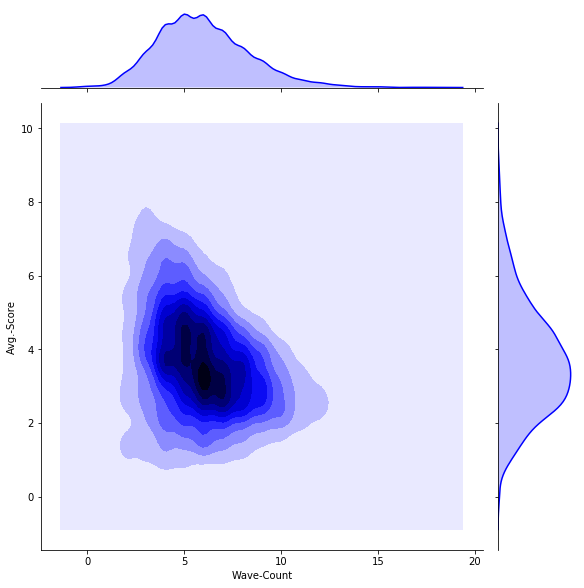

In [4]:
x = modified_df['Wave-Count']
y = modified_df['Avg.-Score']
sns.jointplot(x, y, kind='kde', color='Blue',height=8.27)

#### Based on the graph above we can see that for the part most average scores are around 3-5, with around a total of 5-7 waves per heat. We can also see a step trend showing that for the surfers that have a higher wave count per heat, the average score tends to drop off quite a bit.<br><br>Lets explore the average score in a little more detail. We're going to start out by creating a dictionary with the average wave count for each surfer.

In [5]:
surfers = modified_df.Name.unique()   # collect names of every individual surfer
countAvg = {}   # dictionary to hold name and average wave count for all surfers

# loop through all surfers, avg their wave count and add to dictionary
for e in surfers:
    tempDF = modified_df[modified_df['Name'] == e]
    countAvg[e] = tempDF['Wave-Count'].mean()

#### Now that we have that we will simply display on a bar graph the top, middle, and bottom five surfers based on average number of waves caught per heat.

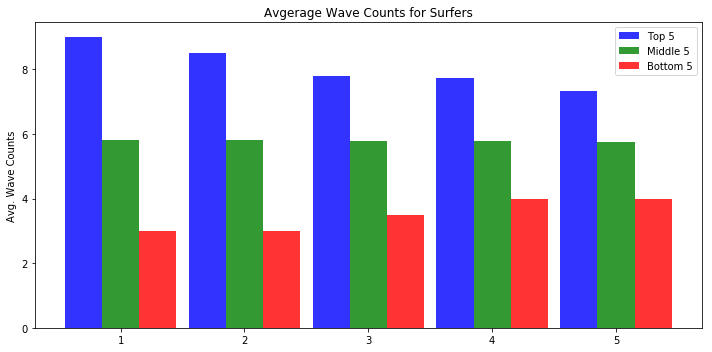

In [6]:
size = len(countAvg)   # find the size of the dictionary
mp = int(size/2)   # find the midpoint of the dictionary

# create 3 separate dictionaries holding the top, middle, and bottom 5 avg of wave count for all surfers
top5Avg = dict(sorted(countAvg.items(), key=operator.itemgetter(1), reverse=True)[:5])
middle5Avg = dict(sorted(countAvg.items(), key=operator.itemgetter(1), reverse=True)[mp-2:mp+3])
bottom5Avg = dict(sorted(countAvg.items(), key=operator.itemgetter(1), reverse=False)[:5])

# build the bar graph to display the dictionaries created above
plt.rcParams["figure.figsize"] = [10,5]
n_groups = 5
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.3
opacity = 0.8

rects1 = plt.bar(index, list(top5Avg.values()), bar_width,
alpha=opacity,
color='b',
label='Top 5')

rects2 = plt.bar(index + bar_width, list(middle5Avg.values()), bar_width,
alpha=opacity,
color='g',
label='Middle 5')

rects3 = plt.bar(index + bar_width*2, list(bottom5Avg.values()), bar_width,
alpha=opacity,
color='r',
label='Bottom 5')

plt.ylabel('Avg. Wave Counts')
plt.title('Avgerage Wave Counts for Surfers')
plt.xticks(index + bar_width, ('1', '2', '3', '4', '5'))
plt.legend()

plt.tight_layout()
plt.show()

#### The bar graph above is showing the spread between the top 5 surfers with the highest average wave count, the middle 5 surfers average wave count and the bottom 5 surfers with the lowest average wave count. From this graph we can see very few of the top surfers average more than 8 waves per heat. The first 2 groupings show a large spread between the highest average wave count and the lowest average wave count. However, even by the 5th grouping, the averages are begining to converge.

#### Even though the convergence may seem to show that a majority of surfers average arond the same number of waves per heat, this is a very broad overview of the data. We will continue to dive deeper into the data to try and learn more.

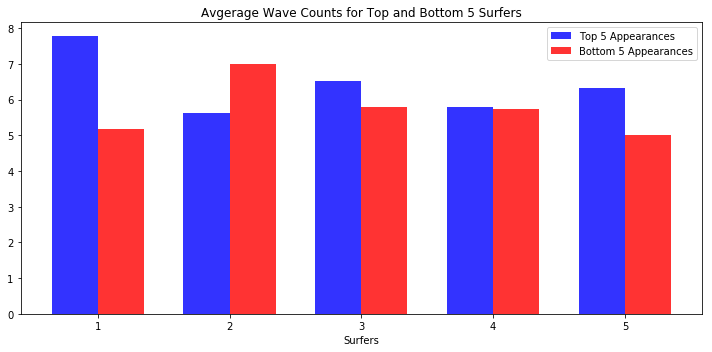

In [7]:
# filter down the dataframe so that it only contains later rounds and count the number of occurances for each surfer
# in these later rounds
laterRounds = modified_df[(modified_df.Round == 'Quarterfinals') | (modified_df.Round == 'Semifinals') | (modified_df.Round == 'Finals')].groupby(['Name']).count()
apperances = {}

# create a dictionary with surfer name as key and number of later round appearances as value
for i, row in laterRounds.iterrows():
    apperances[i] = row['Year']

# get the average wave count for the 5 surfers with the most later round appearances and the 
# least later round appearances
top5Appear = dict(sorted(apperances.items(), key=operator.itemgetter(1), reverse=True)[:5])
avgTopWaveCount = []
for s in top5Appear:
    avgTopWaveCount.append(countAvg[s])
    
bottom5Appear = dict(sorted(apperances.items(), key=operator.itemgetter(1), reverse=False)[:5])
avgBottomWaveCount = []
for s in bottom5Appear:
    avgBottomWaveCount.append(countAvg[s])
    
# create a graph to compare these average wave counts
plt.rcParams["figure.figsize"] = [10,5]
n_groups = 5
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, avgTopWaveCount, bar_width,
alpha=opacity,
color='b',
label='Top 5 Appearances')

rects2 = plt.bar(index + bar_width, avgBottomWaveCount, bar_width,
alpha=opacity,
color='r',
label='Bottom 5 Appearances')

plt.xlabel('Surfers')
plt.title('Avgerage Wave Counts for Top and Bottom 5 Surfers')
plt.xticks(index + bar_width/2, ('1', '2', '3', '4', '5'))
plt.legend()

plt.tight_layout()
plt.show()

#### The above graph compares the average wave counts between the 5 surfers with the most numbers of appearances in later rounds (Quarterfinals, Semifinals, and Finals) and the 5 surfers with the least number of appearances in later rounds (we will use this to describe the performance of a surfer).<br><br>Looking at the graph, beside the second group, the surfers who make more later rounds have a higher average wave count. However, the averages are similar to one another, showing that just average wave count may not be the main indicator for how well a surfer will do in an event. Now we will begin to look further into what might allow one surfer to succeed over another.

#### To start out, we're going to look at how the top performing surfers wave score averages change in relation to the heat they are surfing in.

In [8]:
# get list of the 5 surfers who had the most number of finals appearances
top5Finals = modified_df[(modified_df.Round == 'Finals')].groupby(['Name']).count().sort_values('Year').index[-5:].tolist()

# this dictionary will hold the average score for a surfer for each round
# the key will be the surfers name
# the value will be represented as follows: [('round name', score), ('round name', score), ...]
avgRoundScores = {}
avgRoundWaveCount = {}

for s in top5Finals:
    scoreAvg = modified_df[(modified_df.Name == s)].groupby(['Round']).mean()   # get the mean score for each round
    roundList = []
    countList = []

    # because the dataframe lists the rounds out of order, some reodering must be done while creating the list
    for i, row in scoreAvg.iterrows():
        t = (i, row['Avg.-Score'])
        t2 = (i, row['Wave-Count'])

        if (i == 'Finals'):
            roundList.append(t)
            countList.append(t2)
        elif (i == 'Quarterfinals'):
            roundList.insert(0, t)
            countList.insert(0, t2)
        elif (i == 'Round 1'):
            roundList.insert(0, t)
            countList.insert(0, t2)
        elif (i == 'Round 2'):
            roundList.insert(1, t)
            countList.insert(1, t2)
        elif (i == 'Round 3'):
            roundList.insert(2, t)
            countList.insert(2, t2)
        elif (i == 'Round 4'):
            roundList.insert(3, t)
            countList.insert(3, t2)
        elif (i == 'Round 5'):
            roundList.insert(4, t)
            countList.insert(4, t2)
        elif (i == 'Semifinals'):
            roundList.insert(6, t)
            countList.insert(6, t2)
    
    avgRoundScores[s] = roundList   # add to the dictionary
    avgRoundWaveCount[s] = countList

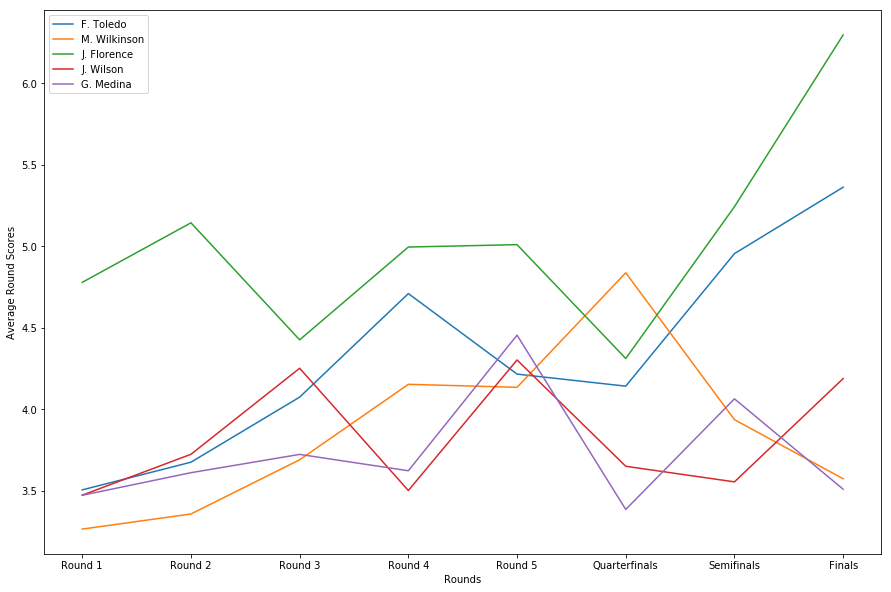

In [9]:
# creat line graph of surfers average scores
plt.rcParams["figure.figsize"] = [15,10]
xAxisTicks = ['Round 1', 'Round 2', 'Round 3', 'Round 4', 'Round 5', 'Quarterfinals', 'Semifinals', 'Finals']

for s in top5Finals:
    scores = []
    values = avgRoundScores[s]   # collect value for that key
    
    for v in values:
        scores.append(v[1])
    
    plt.plot(xAxisTicks, scores, label=s)
    
plt.ylabel('Average Round Scores')
plt.xlabel('Rounds')
plt.legend()
plt.show()

#### This graph shows how the 5 surfers with the most number of finals appearances average round score for each of the eight rounds. From the graph we can see that while some of these surfers will begin to improve there average scores in later round heats, others may being to perform poorly.<br>We can see for example that John John Florence on average really begins to preform well once he hits the quarterfinals, which is the same with Filipe Toledo. However Matt Wilkinson can be seen to build up to the quarterfinals, but then fall back down in his average scores.
#### Let's change what we're looking at for a bit now. We're going to move back out to broader view of all the data and look at the heat total now.<br>First, lets get a list of all the events that have been run in the past 3 years. This will just allow for a visual representation all the events.

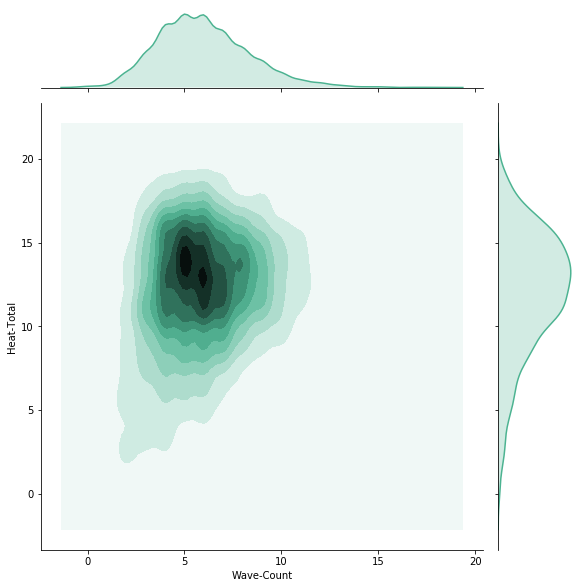

In [10]:
x = modified_df['Wave-Count']
y = modified_df['Heat-Total']
sns.jointplot(x, y, kind='kde', color='#4CB391',height=8.27)

#### Looking at the graph above we can see that the distribution of wave counts is very dense around 5 or 6 and the heat total is dense between 10 and 15. We can also see that there is a relationship between wave count and heat total. For the most part, the scores fall within a specific range, although as the wave counts get around 10 or above, the distribution of higher scores starts to fall. This could be because heats with high wave counts don't usually have good surf, so the surfers go for more waves. It could also be showing that surfers that are struggling during a heat try to catch more waves to componsate, but it doesn't always work. 
#### Lets try viewing this in a slight different manor now, adding in the location.

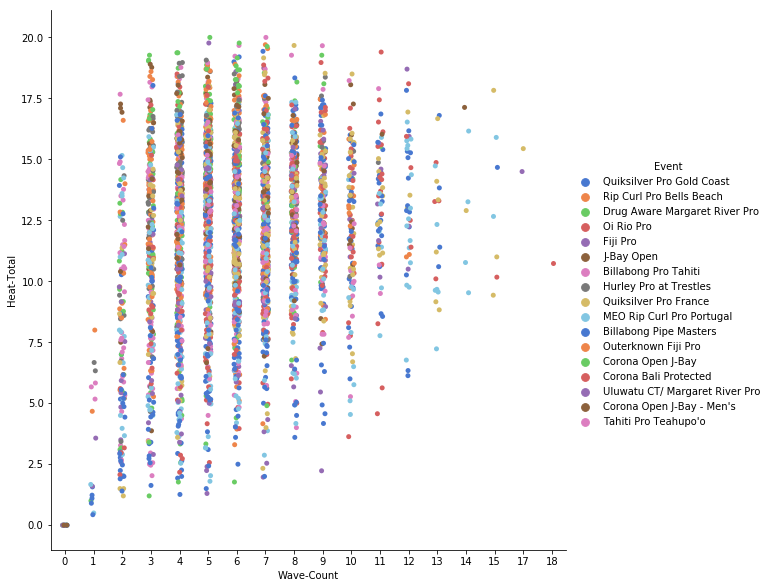

In [11]:
sns.catplot(x='Wave-Count', y='Heat-Total', hue='Event', palette='muted', data=modified_df, height=8.27)

#### We can see here that when looking at the actual heat total, wave counts between 3 and 7 don't have a large variation. We can however see, that around 8 waves per heat and up, the scores begin to converge to between 10 and 16. This could still be showing what was described by the graph above. But with this graph we have the added dimension of location. We can see that there is a dense grouping of blue points, relating to the Quiksilver Pro Gold Coast, MEO Rip Curl Pro Portugal, Billabong Pipe Masters towards the lower heat totals.<br>Lets look further into the distributions in between the event locations, but first, lets list out the names of the locations just so we have a visual.

In [12]:
locs = modified_df.Event.unique()   # collect all the event locations
display(locs)

array(['Quiksilver Pro Gold Coast', 'Rip Curl Pro Bells Beach',
       'Drug Aware Margaret River Pro', 'Oi Rio Pro', 'Fiji Pro',
       'J-Bay Open', 'Billabong Pro Tahiti', 'Hurley Pro at Trestles',
       'Quiksilver Pro France', 'MEO Rip Curl Pro Portugal',
       'Billabong Pipe Masters', 'Outerknown Fiji Pro',
       'Corona Open J-Bay', 'Corona Bali Protected',
       'Uluwatu CT/ Margaret River Pro', "Corona Open J-Bay - Men's",
       "Tahiti Pro Teahupo'o"], dtype=object)

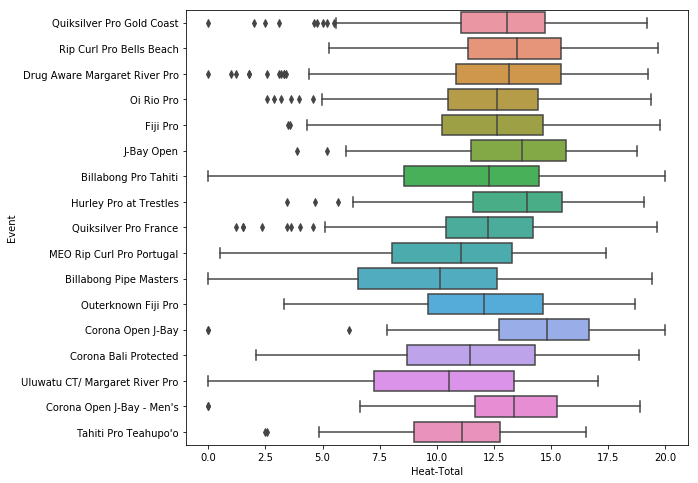

In [13]:
f, ax = plt.subplots(figsize=(9, 8))
sns.boxplot(x='Heat-Total', y='Event', data=modified_df)

#### Right off the bat, viewing the above graph, we can see that all the out liers are on lower scoring heats, there are no outliers on the upper ends. We can also see that the events with a higher median also have a smaller range of values, such as the Corona Open J-Bay or the Hurley Pro at Trestles as compared to events like the Billabong Pro Tahiti or the Billabong Pipe Masters. This could indicate that the event location could play a hand in the outcome of scores for surfers.
#### Lets take a look at similar data to this for the top 5 surfers that we discussed previously in the form of a pivot table.

In [14]:
pd.set_option('display.max_rows', None)
top5DF = modified_df[modified_df.Name.isin(top5Finals)]   # create a new df by filtering out the top 5 surfers from the original df
events_pivot = pd.pivot_table(top5DF, index=['Name', 'Event'], values=['Avg.-Score', 'Wave-Count', 'Heat-Total'], aggfunc=np.mean)
events_pivot['Avg.-Wave-Count'] = events_pivot['Wave-Count'].astype(int)
events_pivot.drop(['Wave-Count'], axis=1, inplace=True)
display(events_pivot)

Avg.-Score  Heat-Total  \
Name         Event                                                    
F. Toledo    Billabong Pipe Masters            2.993333    9.195556   
             Billabong Pro Tahiti              2.605000    7.655000   
             Corona Bali Protected             3.192000   12.986000   
             Corona Open J-Bay                 5.121429   15.304286   
             Corona Open J-Bay - Men's         5.420000   16.811667   
             Drug Aware Margaret River Pro     4.627143   12.202857   
             Fiji Pro                          3.985000   10.130000   
             Hurley Pro at Trestles            5.558182   16.720909   
             J-Bay Open                        4.433333   14.646667   
             MEO Rip Curl Pro Portugal         3.505000   11.017500   
             Oi Rio Pro                        3.173333   13.565000   
             Quiksilver Pro France             3.240000   13.144000   
             Quiksilver Pro Gold Coast         4.065455   14.166364   
             Rip Curl Pro Bells Beach          5.611250   15.432500   
             Tahiti Pro Teahupo'o              4.016000   12.604000   
             Uluwatu CT/ Margaret River Pro    2.930000   10.212500   
G. Medina    Billabong Pipe Masters            3.842857   14.200000   
             Billabong Pro Tahiti              4.436154   15.162308   
             Corona Bali Protected             3.300000   10.686667   
             Corona Open J-Bay                 5.234000   17.100000   
             Corona Open J-Bay - Men's         4.250000   14.997500   
             Drug Aware Margaret River Pro     3.591667   12.133333   
             Fiji Pro                          2.742857   14.061429   
             Hurley Pro at Trestles            4.152500   14.775000   
             J-Bay Open                        3.820000   14.812000   
             MEO Rip Curl Pro Portugal         2.970667   12.875333   
             Oi Rio Pro                        3.187333   14.074000   
             Outerknown Fiji Pro               3.405000   13.735000   
             Quiksilver Pro France             3.601176   14.449412   
             Quiksilver Pro Gold Coast         3.744000   14.269000   
             Rip Curl Pro Bells Beach          4.338889   13.815556   
             Tahiti Pro Teahupo'o              3.118333   14.221667   
             Uluwatu CT/ Margaret River Pro    2.772500   12.157500   
J. Florence  Billabong Pipe Masters            4.014000   14.079000   
             Billabong Pro Tahiti              5.368182   15.243636   
             Corona Bali Protected             4.630000   13.270000   
             Corona Open J-Bay                 6.532000   17.996000   
             Drug Aware Margaret River Pro     6.427500   17.856250   
             Fiji Pro                          4.084000   14.690000   
             Hurley Pro at Trestles            5.811250   14.897500   
             J-Bay Open                        5.690000   15.300000   
             MEO Rip Curl Pro Portugal         4.403636   13.427273   
             Oi Rio Pro                        4.240769   13.854615   
             Outerknown Fiji Pro               3.685000   14.085000   
             Quiksilver Pro France             4.410000   16.503636   
             Quiksilver Pro Gold Coast         4.282500   13.734167   
             Rip Curl Pro Bells Beach          4.802222   15.414444   
             Uluwatu CT/ Margaret River Pro    2.615000    7.300000   
J. Wilson    Billabong Pipe Masters            2.332143   10.266429   
             Billabong Pro Tahiti              4.647500   14.124167   
             Corona Bali Protected             2.725000   11.665000   
             Corona Open J-Bay                 4.484286   15.031429   
             Corona Open J-Bay - Men's         4.392000   12.750000   
             Drug Aware Margaret River Pro     4.782727   14.530909   
             Fiji Pro                          3.995000   10.165000  

#### Looking at this pivot table we can see that these top surfers score well without high wave counts. For instance, Matt Wilkinson and John John Florence don't average more that 7 waves per heat and still score well enough to make it to our top 5. We can also see that for some surfers like Filipe Toledo seem to perform worse when they have a higher wave count. This could indicate that when they aren't performing well they being to scramble and try to catch more waves.
#### Now we are going to look into how all the features are correlated. Inorder to do this, we will first need to one hot encode the events since they are currently represented as strings. Following this, we will build a heat map to represent the matrix

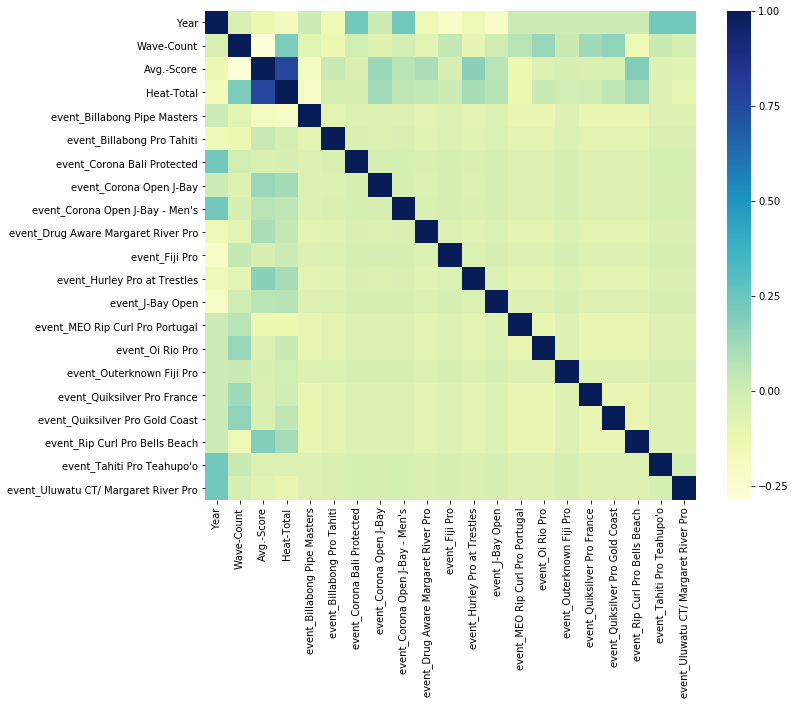

In [15]:
encoded_events = pd.get_dummies(modified_df['Event'], prefix = 'event')   # one-hot-encode the events
encoded_df = pd.concat([modified_df, encoded_events], axis=1)   # add the encodings and original dataframe together
corr = encoded_df.corr()   # build a correlation matrix

f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap="YlGnBu")

#### From this heat map we can clearly see that there is no correlation between the events and very little correlation anywhere else. The strongest correlation is between heat total and averge score which is to be expected since they are both based off of the same data. Apart from this though, it seems as though there is a little correlation between heat totals, wave counts, and average score with some of the events, but certainly not all. It also be see that there is a possible negative correlation between wave counts and average score.
#### This analysis leaves much to be desired, not finding strong correlations between much as the data points we collected. This could be due to the random nature of surfing, relying on nature to produce in order to score and our data doesn't have enough detail to show this relationship. I would like to thank you for reading my analysis and this is my first real attempt at a true data science notebook. I will be keeping with the theme of surfing and scoring of waves in another notebook where I will use deep learning to analyze many labeled videos of scored waves and will attempt to predict a score based off of a video.